In [55]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt 
from astropy import units as u
from astropy import constants as astrocst
import pandas as pd
import scipy
import scipy.constants as cst
import artpop

# artpop's matplotlib style
plt.style.use(artpop.mpl_style)

# pd output style
pd.set_option('display.float_format','{:.6e}'.format)

In [56]:
# read in data
file_path_Z = 'asu_ZAMS.tsv'
file_path_T = 'asu_TAMS.tsv'

df_Z = pd.read_csv(file_path_Z, sep=";", comment='#', skiprows=1)
df_T = pd.read_csv(file_path_T, sep=";", comment='#', skiprows=1)

df_Z.drop([0,1], inplace= True)
df_Z.reset_index(inplace= True, drop=True)
df_Z = df_Z.astype(dtype = np.float64)

df_T.drop([0,1], inplace= True)
df_T.reset_index(inplace= True, drop=True)
df_T = df_T.astype(dtype = np.float64)

In [57]:
df_T

,Mini,Line,Time,logL,logTe
0,8.000000e-01,1.100000e+02,2.150780e+10,-2.070000e-01,3.715000e+00
1,9.000000e-01,1.100000e+02,1.341620e+10,-9.000000e-03,3.741000e+00
2,1.000000e+00,1.100000e+02,8.495450e+09,1.570000e-01,3.762000e+00
3,1.100000e+00,1.100000e+02,5.460530e+09,3.050000e-01,3.780000e+00
4,1.250000e+00,1.100000e+02,4.222490e+09,5.820000e-01,3.800000e+00
5,1.350000e+00,1.100000e+02,3.138650e+09,7.380000e-01,3.817000e+00
6,1.500000e+00,1.100000e+02,2.239180e+09,9.380000e-01,3.839000e+00
7,1.700000e+00,1.100000e+02,1.645150e+09,1.189000e+00,3.864000e+00
8,2.000000e+00,1.100000e+02,1.017040e+09,1.484000e+00,3.912000e+00
9,2.500000e+00,1.100000e+02,5.423250e+08,1.883000e+00,3.978000e+00


In [58]:
df_Z

,Mini,Line,Time,logL,logTe
0,8.000000e-01,1.000000e+00,7.478390e+07,-5.910000e-01,3.688000e+00
1,9.000000e-01,1.000000e+00,4.487030e+07,-3.560000e-01,3.724000e+00
2,1.000000e+00,1.000000e+00,4.487030e+07,-1.380000e-01,3.754000e+00
3,1.100000e+00,1.000000e+00,2.749950e+07,6.400000e-02,3.779000e+00
4,1.250000e+00,1.000000e+00,2.742830e+07,2.950000e-01,3.804000e+00
5,1.350000e+00,1.000000e+00,2.087670e+07,4.600000e-01,3.824000e+00
6,1.500000e+00,1.000000e+00,1.598740e+07,6.740000e-01,3.856000e+00
7,1.700000e+00,1.000000e+00,1.345000e+07,9.140000e-01,3.910000e+00
8,2.000000e+00,1.000000e+00,9.149770e+06,1.209000e+00,3.973000e+00
9,2.500000e+00,1.000000e+00,4.867040e+06,1.596000e+00,4.049000e+00


Text(0.5, 1.0, 'MS lifetime vs M$_\\text{ini}$ of stars (Ekström et al. 2012)')

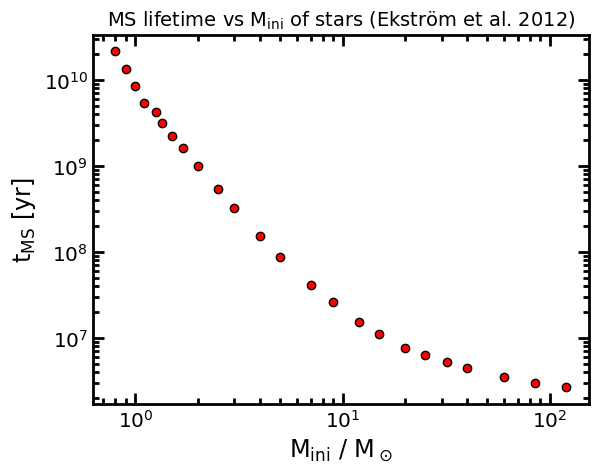

In [59]:
# Problem 1 part b

life_time = np.subtract(df_T['Time'], df_Z['Time'])
plt.plot(df_Z['Mini'], life_time, 'o', c='red', mec='k')
plt.minorticks_on()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'M$_\text{ini}$ / M$_\odot$')
plt.ylabel(r't$_\text{MS}$ [yr]')
plt.title(r'MS lifetime vs M$_\text{ini}$ of stars (Ekström et al. 2012)', fontsize=14)

Text(0.5, 1.0, 'HR diagram of stars (Ekström et al. 2012)')

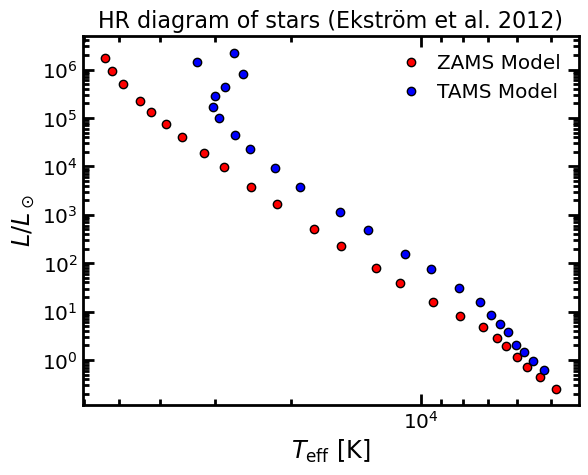

In [60]:
# Problem 1 part c

plt.plot(np.power(10,df_Z['logTe']), np.power(10,df_Z['logL']), 'o', c='red', label='ZAMS Model', mec='k')
plt.plot(np.power(10,df_T['logTe']), np.power(10,df_T['logL']), 'o', c='blue', label='TAMS Model', mec='k')
plt.minorticks_on()
plt.gca().invert_xaxis()
plt.xscale('log')
plt.yscale('log')
plt.legend(loc=1)
plt.xlabel(r'$T_\text{eff}$ [K]')
plt.ylabel(r'$L / L_\odot$')
plt.title(r'HR diagram of stars (Ekström et al. 2012)', fontsize=16)

In [61]:
# Problem 1 part d
L_sun = 3.826e26
M_sun = 1.989e30
M_p = 1.67262192e-27
H_frac = 0.72
L_avg = L_sun * np.add(np.power(10,df_Z['logL']), np.power(10,df_T['logL']))/2
E_total = np.multiply(life_time, L_avg)*365*24*60*60
M_H = E_total/4.283e-12*4*M_p
M_H_ini = df_Z['Mini']*M_sun*H_frac
H_fused = np.divide(M_H, M_H_ini)
print(H_fused)

0    1.546728e-01
1    1.388347e-01
2    1.202987e-01
3    1.032643e-01
4    1.279119e-01
5    1.269636e-01
6    1.305986e-01
7    1.494162e-01
8    1.547354e-01
9    1.638653e-01
10   1.665490e-01
11   1.793080e-01
12   1.907124e-01
13   2.152048e-01
14   2.508062e-01
15   2.749942e-01
16   3.070218e-01
17   3.602470e-01
18   4.073996e-01
19   4.517209e-01
20   4.813021e-01
21   5.102423e-01
22   5.514067e-01
23   5.760833e-01
dtype: float64


Text(0.5, 1.0, 'Hydrogen MS fusion fraction vs initial mass (Ekström et al. 2012)')

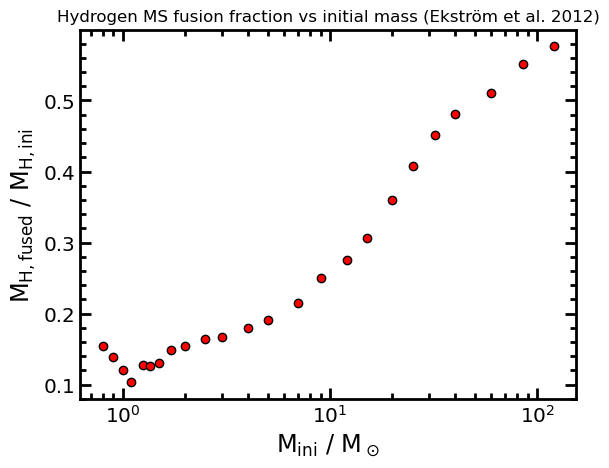

In [66]:
plt.plot(df_Z['Mini'], H_fused, 'o', c='red', mec='k')
plt.minorticks_on()
plt.xscale('log')
plt.xlabel(r'M$_\text{ini}$ / M$_\odot$')
plt.ylabel(r'M$_{\text{H},\text{fused}}$ / M$ _{\text{H},\text{ini}}$')
plt.title(r'Hydrogen MS fusion fraction vs initial mass (Ekström et al. 2012)', fontsize=12)

Text(0.5, 1.0, 'Hydrogen MS fusion fraction vs initial mass (Ekström et al. 2012)')

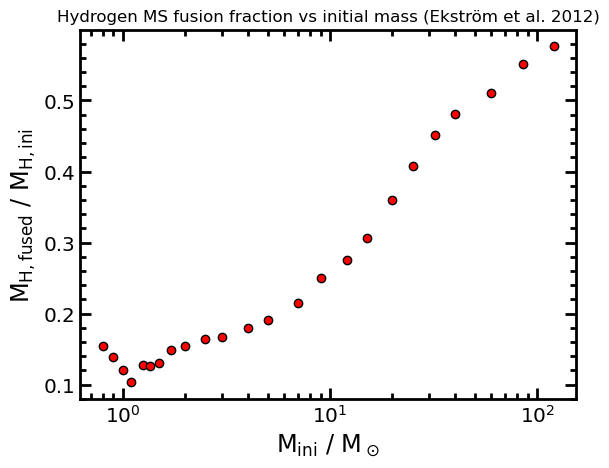

In [ ]:
plt.plot(df_Z['Mini'], H_fused, 'o', c='red', mec='k')
plt.minorticks_on()
plt.xscale('log')
plt.xlabel(r'M$_\text{ini}$ / M$_\odot$')
plt.ylabel(r'M$_{\text{H},\text{fused}}$ / M$ _{\text{H},\text{ini}}$')
plt.title(r'Hydrogen MS fusion fraction vs initial mass (Ekström et al. 2012)', fontsize=12)